#Circle Detection with Hough Cirlces

cv2.HoughCircles(image, method, dp, MinDist, param1, param2, minRadius, MaxRadius)


**Method** - currently only cv2.HOUGH_GRADIENT available

**dp** - Inverse ratio of accumulator resolution

**MinDist** - the minimum distance between the center of detected circles

**param1**- Gradient value used in the edge detection

**param2**>- Accumulator threshold for the HOUGH_GRADIENT method, lower allows 
more circles to be detected (false positives)

**minRadius** - limits the smallest circle to this size (via radius)

**MaxRadius**- similarly sets the limit for the largest circles

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab.patches import cv2_imshow

def imshow(name, img):
  cv2_imshow(img)

Mounted at /content/drive


Number of circles Detected:  28


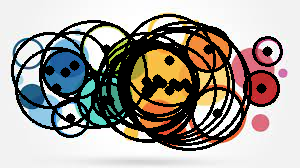

In [2]:
#circle detection by hough circles

import cv2
import numpy as np
import cv2

image = cv2.imread('/content/drive/MyDrive/SoS_Computer Vision/Python Notebooks/openCV_library/circle.jfif')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 5)
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 2.3, 1)
print("Number of circles Detected: ",len(circles[0]))
for i in circles[0,:]:
       # draw the outer circle
        cv2.circle(image,(i[0], i[1]), i[2], (0, 0, 0), 2)
      
       # draw the center of the circle
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 0), 5)

imshow('detected circles', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

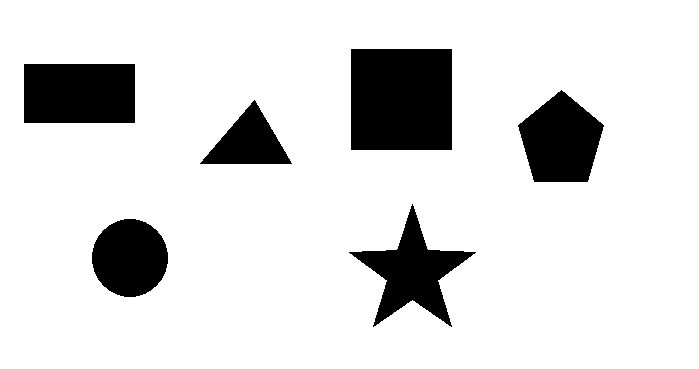

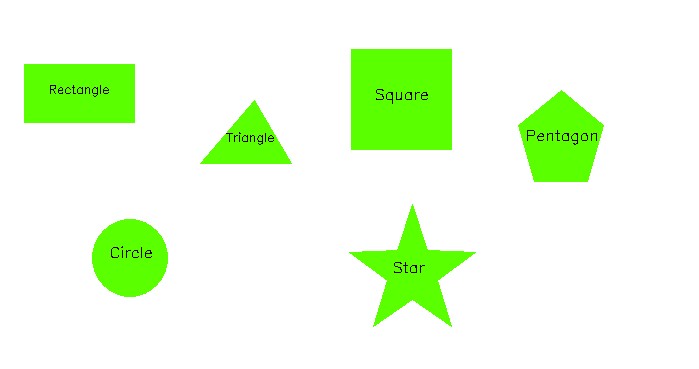

In [5]:
#identifying contour's shape
#detecting contours and classifying on the basis of number of edges
import cv2
import numpy as np
im = cv2.imread('/content/drive/MyDrive/SoS_Computer Vision/Python Notebooks/openCV_library/shapes_6.png')
shape = cv2.imread('/content/drive/MyDrive/SoS_Computer Vision/Python Notebooks/openCV_library/shapes_6.png',0)
imshow('shape',shape)
cv2.waitKey()

ret, thr = cv2.threshold(shape, 127,255,1)

contours, hier = cv2.findContours(thr.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)   #detecting contours

for c in contours:
    approx = cv2.approxPolyDP(c,0.01*cv2.arcLength(c,True),True)                   #approximating to closest polygon
    
    if(len(approx) == 3):                                                          #classifyibg polygon on the basis of number of edges
        shape_name = 'Triangle'
        cv2.drawContours(im,[c],0,(0,255,90),-1)
        
        M = cv2.moments(c)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(im,shape_name,(cx-22,cy),cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,0,0),1)
        
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(c)
        
        M = cv2.moments(c)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        
        if abs(w - h) <= 3:
            shape_name = 'Square'
            cv2.drawContours(im,[c],0,(0,255,90),-1)
            cv2.putText(im,shape_name,(cx-27,cy),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),1)
        
        else:
            shape_name = 'Rectangle'
            cv2.drawContours(im,[c],0,(0,255,90),-1)
            cv2.putText(im,shape_name,(cx-31,cy),cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,0,0),1)
            
    elif len(approx) == 5:
        shape_name = 'Pentagon'
        cv2.drawContours(im,[c],0,(0,255,90),-1)
        
        M = cv2.moments(c)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(im,shape_name,(cx-35,cy),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),1)
        
    elif(len(approx) == 10):
        shape_name = 'Star'
        cv2.drawContours(im,[c],0,(0,255,90),-1)
        
        M = cv2.moments(c)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(im,shape_name,(cx-20,cy),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),1)
        
    elif len(approx) >10:
        shape_name = 'Circle'
        cv2.drawContours(im,[c],0,(0,255,90),-1)
        
        M = cv2.moments(c)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(im,shape_name,(cx-20,cy),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),0)

#print(M)
imshow('labelled',im)
cv2.waitKey()
cv2.destroyAllWindows()